## Predicting classes of mice based on protein expression.

The aim of my study is to create a prediction model that predicts the classes of mice when values of certain protein expressions are fed into my model.I chose to apply classification modelling technique on my dataset as I want the model to categorize the data according to classes.
Before the final model, a fair comparison between Decision Tree classifier and KNN classifier is made on the basis of accuracy.The model with higher accuracy for prediction will be considered as the optimal model and the other will be discarded.

Reference of dataset: https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression



In [665]:
import pandas as pd

In [666]:
filename = 'Data_Cortex_Nuclear.csv'

In [667]:
data = pd.read_csv(filename, sep= ',', encoding= 'latin1') #loading csv file 

In [668]:
data.columns # checking column names

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [669]:
data.info() # checking datatypes and dataset information including null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [670]:
data['Genotype'].value_counts() # checking for any spelling error or whitespaces

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

In [671]:
data['Genotype'].replace('Ts65Dn','Trisomic' , inplace = True) # replacing value in column genotypye

In [672]:
data['Genotype'].value_counts()

Control     570
Trisomic    510
Name: Genotype, dtype: int64

In [673]:
data['Treatment'].value_counts()

Memantine    570
Saline       510
Name: Treatment, dtype: int64

In [674]:
data['Behavior'].value_counts()

S/C    555
C/S    525
Name: Behavior, dtype: int64

In [675]:
data['class'].value_counts()

c-CS-m    150
c-SC-m    150
t-SC-m    135
t-SC-s    135
c-CS-s    135
t-CS-m    135
c-SC-s    135
t-CS-s    105
Name: class, dtype: int64

In [676]:
data.iloc[:, 1:77] = data.iloc[:,1:77].apply(lambda x:x.fillna(x.mean()), axis= 0)# replacing NA values with mean

In [677]:
data

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Trisomic,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Trisomic,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Trisomic,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Trisomic,Saline,S/C,t-SC-s


In [678]:
data.drop(['MouseID'],axis = 1,inplace = True) # Dropping the first column

In [679]:
# Data Exploration : exploring 10 columns

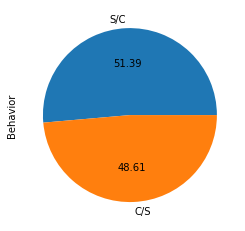

In [680]:
data['Behavior'].value_counts().plot(kind = 'pie' , autopct='%.2f')

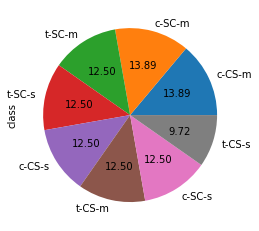

In [681]:
data['class'].value_counts().plot(kind = 'pie' , autopct='%.2f')

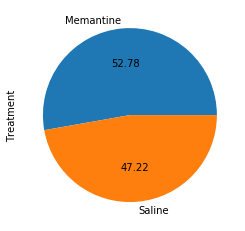

In [682]:
data['Treatment'].value_counts().plot(kind = 'pie' , autopct='%.2f')

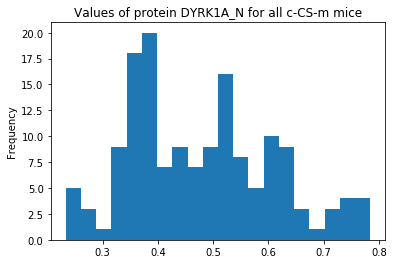

In [683]:
data.loc[:150,'DYRK1A_N'].plot(kind='hist',  bins = 20, title = "Values of protein DYRK1A_N for all c-CS-m mice")

In [684]:
data.loc[:150,'DYRK1A_N'].mean()

0.4794079666953642

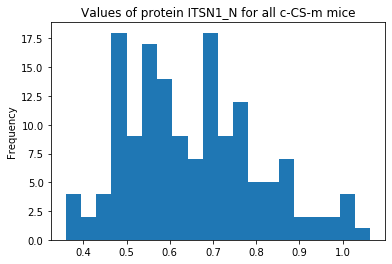

In [685]:
data.loc[:150,'ITSN1_N'].plot(kind='hist',  bins = 20, title = "Values of protein ITSN1_N for all c-CS-m mice")

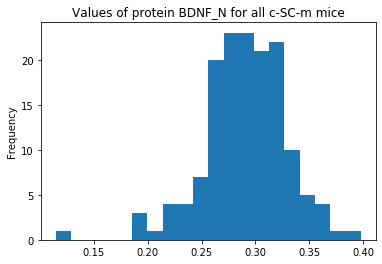

In [686]:
data.loc[150:299,'BDNF_N'].plot(kind='hist',  bins = 20, title = "Values of protein BDNF_N for all c-SC-m mice")

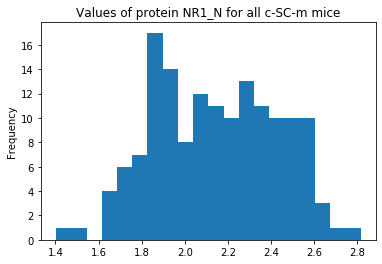

In [687]:
data.loc[150:299,'NR1_N'].plot(kind='hist',  bins = 20, title = "Values of protein NR1_N for all c-SC-m mice")


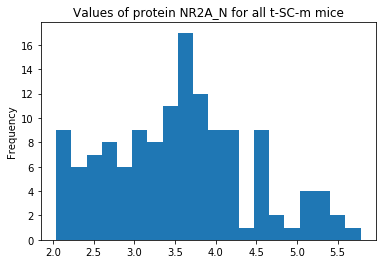

In [688]:
data.loc[570:704,'NR2A_N'].plot(kind='hist',  bins = 20, title = "Values of protein NR2A_N for all t-SC-m mice")


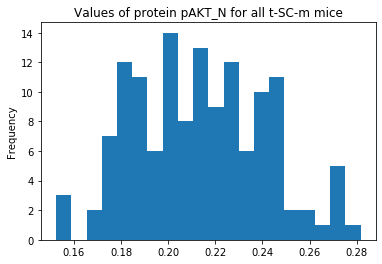

In [689]:
data.loc[570:704,'pAKT_N'].plot(kind='hist',  bins = 20, title = "Values of protein pAKT_N for all t-SC-m mice")


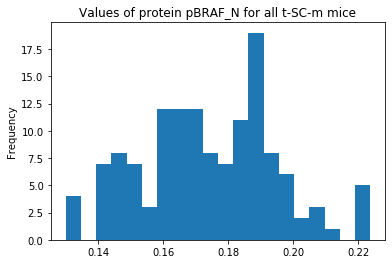

In [690]:
data.loc[570:704,'pBRAF_N'].plot(kind='hist',  bins = 20, title = "Values of protein pBRAF_N for all t-SC-m mice")


In [691]:
# Data Exploration : exploring relationship between columns

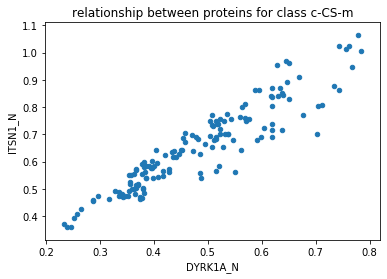

In [692]:
data.loc[:149].plot(kind = 'scatter',x='DYRK1A_N',y='ITSN1_N' , title = "relationship between proteins for class c-CS-m")

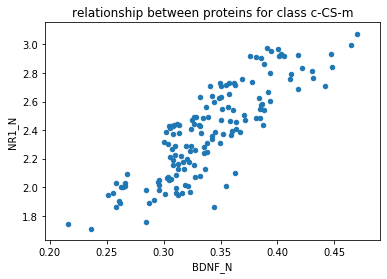

In [693]:
data.loc[:149].plot(kind = 'scatter',x='BDNF_N',y='NR1_N' , title = "relationship between proteins for class c-CS-m")

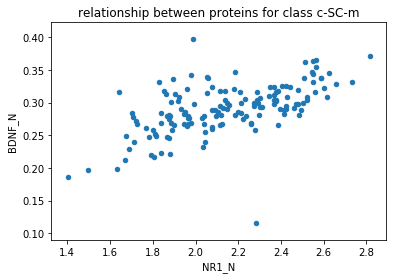

In [694]:
data.loc[150:299].plot(kind = 'scatter',x='NR1_N', y='BDNF_N' , title = "relationship between proteins for class c-SC-m")

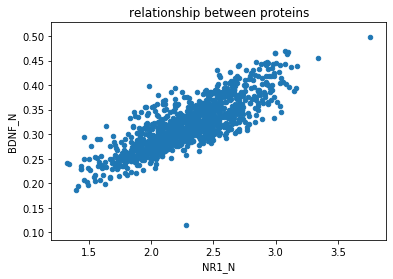

In [695]:
data.plot(kind = 'scatter',x='NR1_N', y='BDNF_N' , title = "relationship between proteins")

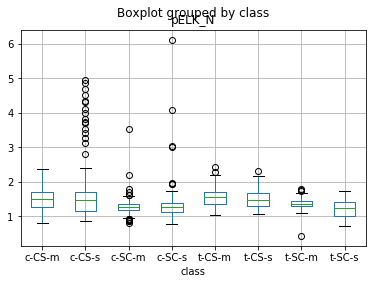

In [696]:
data.dropna().boxplot(column='pELK_N',by = 'class')

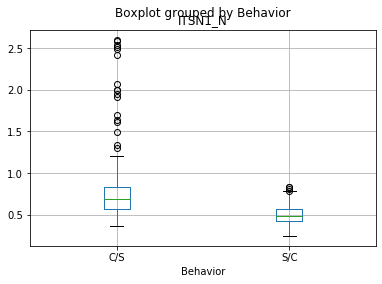

In [697]:
data.dropna().boxplot(column='ITSN1_N',by = 'Behavior')

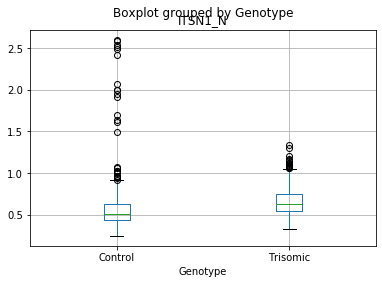

In [698]:
data.dropna().boxplot(column='ITSN1_N',by = 'Genotype')

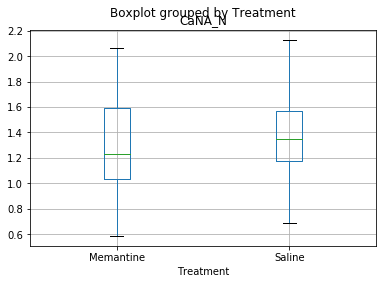

In [699]:
data.dropna().boxplot(column='CaNA_N',by = 'Treatment')

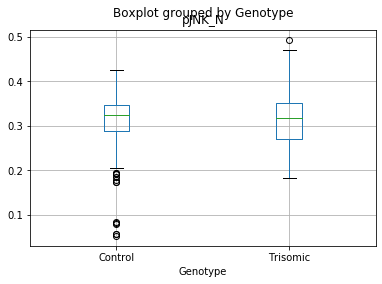

In [700]:
data.dropna().boxplot(column='pJNK_N',by = 'Genotype')

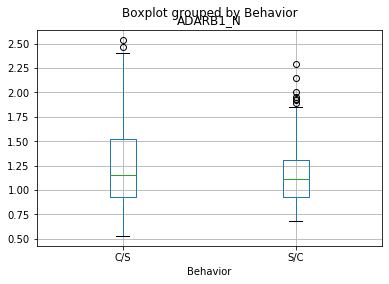

In [701]:
data.dropna().boxplot(column='ADARB1_N',by = 'Behavior')

In [702]:
# Data Modelling : Selecting appropiate features using hill climbing technique

In [703]:
from sklearn.utils import shuffle


In [704]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [705]:
from sklearn.model_selection import train_test_split

In [706]:
from sklearn.metrics import classification_report

In [707]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [708]:
from sklearn import metrics

In [709]:
from sklearn.neighbors import KNeighborsClassifier

In [710]:
X = data.iloc[:,1:77]

In [711]:
y = y = data['class']

In [712]:
import numpy as np

In [713]:
new_Ind = []


In [714]:
np.asarray(data)

array([[0.5036438839999999, 0.7471932240000001, 0.4301753, ...,
        'Memantine', 'C/S', 'c-CS-m'],
       [0.51461708, 0.689063548, 0.411770344, ..., 'Memantine', 'C/S',
        'c-CS-m'],
       [0.509183088, 0.730246795, 0.418308781, ..., 'Memantine', 'C/S',
        'c-CS-m'],
       ...,
       [0.228699552, 0.39517937200000003, 0.234118087, ..., 'Saline',
        'S/C', 't-SC-s'],
       [0.221242406, 0.412894376, 0.243974133, ..., 'Saline', 'S/C',
        't-SC-s'],
       [0.302625723, 0.46105919, 0.256564308, ..., 'Saline', 'S/C',
        't-SC-s']], dtype=object)

In [715]:
cur_MaxScore = 0.0

In [716]:
col_num = 77

In [717]:
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

In [718]:
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newdata = data.iloc[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newdata, data['class'], test_size=0.4, random_state=0)
    clf = KNeighborsClassifier(5)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))


Score with 1 selected features: 0.1527777777777778
Score with 2 selected features: 0.2199074074074074
Score with 3 selected features: 0.2337962962962963
Score with 4 selected features: 0.2638888888888889
Score with 5 selected features: 0.2962962962962963
Score with 6 selected features: 0.3287037037037037
Score with 7 selected features: 0.3449074074074074
Score with 8 selected features: 0.375
Score with 9 selected features: 0.5462962962962963
Score with 10 selected features: 0.5509259259259259
Score with 11 selected features: 0.6759259259259259
Score with 12 selected features: 0.7013888888888888
Score with 13 selected features: 0.7129629629629629
Score with 14 selected features: 0.7384259259259259
Score with 15 selected features: 0.7708333333333334
Score with 16 selected features: 0.7731481481481481
Score with 17 selected features: 0.8171296296296297
Score with 18 selected features: 0.8240740740740741
Score with 19 selected features: 0.875
Score with 20 selected features: 0.886574074074

In [719]:
print("There are " + str(len(new_Ind)) + " features selected:")


There are 50 features selected:


In [720]:
print(new_Ind)

[31, 43, 26, 74, 58, 59, 61, 51, 10, 71, 46, 15, 45, 19, 76, 70, 63, 75, 62, 35, 38, 55, 21, 68, 56, 47, 8, 0, 69, 48, 73, 52, 13, 22, 32, 30, 49, 41, 54, 29, 42, 60, 20, 6, 1, 64, 5, 9, 72, 12]


In [721]:
# Model selection : KNN Classifier

In [722]:
X = data.iloc[:,[31, 43, 26, 74, 58, 59, 61, 51, 10, 71, 46, 15, 45, 19, 76, 70, 63, 75, 62, 35, 38, 55, 21, 68, 56, 47, 8, 0, 69, 48, 73, 52, 13, 22, 32, 30, 49, 41, 54, 29, 42, 60, 20, 6, 1, 64, 5, 9, 72, 12]]

In [723]:
y = data['class']

In [724]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True)

In [725]:
clf = KNeighborsClassifier(5)


In [726]:
fit = clf.fit(X_train,y_train)

In [727]:
y_pred = fit.predict(X_test)

In [728]:
acc = accuracy_score(y_test, y_pred)

In [729]:
print(acc)

0.9197530864197531


In [730]:
cm = confusion_matrix(y_test, y_pred)

In [731]:
print(cm)

[[34  3  0  0  0  0  0  1]
 [ 3 39  0  0  0  1  0  0]
 [ 0  0 37  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0]
 [ 3  0  0  0 40  0  0  0]
 [ 1  4  0  0  0 30  0  0]
 [ 0  0  1  4  0  0 35  0]
 [ 3  0  0  0  0  0  2 42]]


In [732]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      c-CS-m       0.77      0.89      0.83        38
      c-CS-s       0.85      0.91      0.88        43
      c-SC-m       0.97      1.00      0.99        37
      c-SC-s       0.91      1.00      0.95        41
      t-CS-m       1.00      0.93      0.96        43
      t-CS-s       0.97      0.86      0.91        35
      t-SC-m       0.95      0.88      0.91        40
      t-SC-s       0.98      0.89      0.93        47

    accuracy                           0.92       324
   macro avg       0.92      0.92      0.92       324
weighted avg       0.93      0.92      0.92       324



In [ ]:
# K-fold cross validation for KNN

In [733]:
#set KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=1, shuffle=True)

In [734]:
features_Knn =  data.iloc[:,[31, 43, 26, 74, 58, 59, 61, 51, 10, 71, 46, 15, 45, 19, 76, 70, 63, 75, 62, 35, 38, 55, 21, 68, 56, 47, 8, 0, 69, 48, 73, 52, 13, 22, 32, 30, 49, 41, 54, 29, 42, 60, 20, 6, 1, 64, 5, 9, 72, 12]]

In [735]:
target_knn = data['class']

In [736]:
# KFlod cross validation
for k, (train_index, test_index) in enumerate(kf.split(features_Knn)):
 
    X_train, X_test = features_Knn.iloc[train_index], features_Knn.iloc[test_index]
    y_train, y_test = target_knn.iloc[train_index], target_knn.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))

[fold 0] score: 0.98148
[fold 1] score: 0.97222
[fold 2] score: 0.99074
[fold 3] score: 0.98148
[fold 4] score: 0.99074
[fold 5] score: 0.99074
[fold 6] score: 0.98148
[fold 7] score: 0.99074
[fold 8] score: 0.96296
[fold 9] score: 0.95370


In [737]:
# Parameter Tuning : weights = 'distance', p = 1

In [738]:
clf = KNeighborsClassifier(5, weights = 'distance', p = 1)


In [739]:
fit = clf.fit(X_train,y_train)

In [740]:
y_pred = fit.predict(X_test)

In [741]:
acc = accuracy_score(y_test, y_pred)

In [742]:
print(acc)

1.0


In [743]:
# weights = 'uniform', p = 1

In [744]:
clf = KNeighborsClassifier(5, weights = 'uniform', p = 1)


In [745]:
fit = clf.fit(X_train,y_train)

In [746]:
y_pred = fit.predict(X_test)

In [747]:
acc = accuracy_score(y_test, y_pred)

In [748]:
print(acc)

0.9722222222222222


In [749]:
# weights= 'distance', p = 2

In [750]:
clf = KNeighborsClassifier(5, weights = 'distance', p = 2)


In [751]:
fit = clf.fit(X_train,y_train)

In [752]:
y_pred = fit.predict(X_test)

In [753]:
acc = accuracy_score(y_test, y_pred)

In [754]:
print(acc)

0.9814814814814815


In [755]:
# weights = 'uniform', p = 2

In [756]:
clf = KNeighborsClassifier(5, weights = 'uniform', p = 2)

In [757]:
fit = clf.fit(X_train,y_train)

In [758]:
y_pred = fit.predict(X_test)

In [759]:
acc = accuracy_score(y_test, y_pred)

In [760]:
print(acc)

0.9537037037037037


In [761]:
# Feature selection in Decision tree

In [762]:
from sklearn.tree import DecisionTreeClassifier

In [763]:
new_Ind = []


In [764]:
from sklearn.utils import shuffle


In [765]:
import numpy as np

In [766]:
np.asarray(data)

array([[0.5036438839999999, 0.7471932240000001, 0.4301753, ...,
        'Memantine', 'C/S', 'c-CS-m'],
       [0.51461708, 0.689063548, 0.411770344, ..., 'Memantine', 'C/S',
        'c-CS-m'],
       [0.509183088, 0.730246795, 0.418308781, ..., 'Memantine', 'C/S',
        'c-CS-m'],
       ...,
       [0.228699552, 0.39517937200000003, 0.234118087, ..., 'Saline',
        'S/C', 't-SC-s'],
       [0.221242406, 0.412894376, 0.243974133, ..., 'Saline', 'S/C',
        't-SC-s'],
       [0.302625723, 0.46105919, 0.256564308, ..., 'Saline', 'S/C',
        't-SC-s']], dtype=object)

In [767]:
cur_MaxScore = 0.0

In [768]:
col_num = 77

In [769]:
col_Ind_Random = shuffle(range(0,col_num), random_state=0)

In [770]:
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newdata = data.iloc[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newdata, data['class'], test_size=0.4, random_state=1)
    clf = DecisionTreeClassifier()
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))


Score with 1 selected features: 0.19212962962962962
Score with 2 selected features: 0.2523148148148148
Score with 3 selected features: 0.3819444444444444
Score with 4 selected features: 0.44907407407407407
Score with 5 selected features: 0.5138888888888888
Score with 6 selected features: 0.5625
Score with 7 selected features: 0.5949074074074074
Score with 8 selected features: 0.6365740740740741
Score with 9 selected features: 0.6388888888888888
Score with 10 selected features: 0.6388888888888888
Score with 11 selected features: 0.6527777777777778
Score with 12 selected features: 0.6944444444444444
Score with 13 selected features: 0.7083333333333334
Score with 14 selected features: 0.7199074074074074
Score with 15 selected features: 0.7291666666666666
Score with 16 selected features: 0.7754629629629629
Score with 17 selected features: 0.7870370370370371
Score with 18 selected features: 0.8032407407407407
Score with 19 selected features: 0.8148148148148148
Score with 20 selected features

In [771]:
print("There are " + str(len(new_Ind)) + " features selected:")


There are 22 features selected:


In [772]:
print(new_Ind)

[48, 74, 59, 54, 34, 26, 68, 45, 69, 60, 3, 42, 7, 22, 41, 50, 38, 56, 30, 32, 66, 14]


In [773]:
X2 = data.iloc[:,new_Ind]

In [774]:
y2 = data['class']

In [775]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.3, shuffle=True)

In [776]:
clf2 = DecisionTreeClassifier()

In [777]:
fit = clf2.fit(X_train,y_train)

In [778]:
y_pred = fit.predict(X_test)

In [779]:
acc = accuracy_score(y_test, y_pred)

In [780]:
print(acc)

0.8302469135802469


In [781]:
cm2 = confusion_matrix(y_test, y_pred)

In [782]:
print(cm2)

[[38  3  0  0  2  4  0  0]
 [ 7 27  1  0  3  0  0  0]
 [ 2  0 37  1  0  0  1  0]
 [ 0  0  2 36  0  0  2  2]
 [ 2  1  0  0 32  1  0  1]
 [ 2  4  0  0  4 28  0  0]
 [ 0  0  4  1  0  0 38  4]
 [ 0  0  0  0  0  0  1 33]]


In [783]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      c-CS-m       0.75      0.81      0.78        47
      c-CS-s       0.77      0.71      0.74        38
      c-SC-m       0.84      0.90      0.87        41
      c-SC-s       0.95      0.86      0.90        42
      t-CS-m       0.78      0.86      0.82        37
      t-CS-s       0.85      0.74      0.79        38
      t-SC-m       0.90      0.81      0.85        47
      t-SC-s       0.82      0.97      0.89        34

    accuracy                           0.83       324
   macro avg       0.83      0.83      0.83       324
weighted avg       0.83      0.83      0.83       324



In [784]:
clf2 = DecisionTreeClassifier(max_features = 'sqrt') #parameter tuning in decision tree

In [785]:
fit = clf2.fit(X_train,y_train)

In [786]:
y_pred = fit.predict(X_test)

In [787]:
acc = accuracy_score(y_test, y_pred)

In [788]:
print(acc)

0.7685185185185185


In [ ]:
# K -fold cross validation for decision tree

In [791]:
features_dt = data.iloc[:,new_Ind]

In [792]:
target_dt = data['class']

In [794]:
for k, (train_index, test_index) in enumerate(kf.split(features_dt)): # k-fold cross validation
 
    X_train, X_test = features_dt.iloc[train_index], features_dt.iloc[test_index]
    y_train, y_test = target_dt.iloc[train_index], target_dt.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))

[fold 0] score: 0.80556
[fold 1] score: 0.85185
[fold 2] score: 0.89815
[fold 3] score: 0.90741
[fold 4] score: 0.86111
[fold 5] score: 0.85185
[fold 6] score: 0.85185
[fold 7] score: 0.86111
[fold 8] score: 0.84259
[fold 9] score: 0.85185
